In [1]:
import gym
import math
#from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt

In [63]:
class Planner:

    '''
    Initialization of all necessary variables to generate a policy:
        discretized state space
        control space
        discount factor
        learning rate
        greedy probability (if applicable)
    '''
    def __init__(self):
        self.N_actions = 3
        self.N_bins = 39  #the number of disctrized states
        self.epsilon = 0.01
        self.gamma = 0.99
        #we can use both a fixed learning rate or a decreasing one
        self.alpha = 0.001
        
        self.initial_learning_rate = 1.0 # initial learning rate
        self.min_learning_rate = 0.005   # minimum learning rate
        
        self.position_space = np.linspace(-1.2, 0.6, self.N_bins-1, endpoint=False)
        self.velocity_space = np.linspace(-0.07, 0.07, self.N_bins-1, endpoint=False)
        self.policy_matrix = np.random.randint(low=0,high=self.N_actions,size=(self.N_bins,self.N_bins))
        self.Q_matrix = np.zeros((self.N_bins,self.N_bins, self.N_actions))
        self.step_list = []
        self.cost_list = []
        self.record0 = [] 
        self.record1 = [] 
        self.record2 = [] 
        self.policy_done = False
        self.state0 = (np.digitize(0.0,self.position_space),np.digitize(0.0,self.velocity_space))
        self.state1 = (np.digitize(-1.0,self.position_space),np.digitize(0.04,self.velocity_space))
        self.state2 = (np.digitize(0.25,self.position_space),np.digitize(-0.029,self.velocity_space))
    '''
    Learn and return a policy via model-free policy iteration.
    '''
    def __call__(self, mc=False, on=True, render=False):
        episodes = 10000
        traj = []
        for episode in range(episodes):
             self._td_policy_iter(episode,on, render)
             
        env.close()
        return 


    '''
    TO BE IMPLEMENT
    TD Policy Iteration
    Flags: on : on vs. off policy learning
    Returns: policy that minimizes Q wrt to controls
    '''
    def _td_policy_iter(self, time,on=True, render=False):
        # reset to start point
        observation = env.reset()
        cur_state = (np.digitize(observation[0],self.position_space),np.digitize(observation[1],self.velocity_space))
        total_cost = 0
        step =0
        find_goal = False
        # record the change of Q value for three state
        if time%50==0:
            self.record0.append((self.Q_matrix[self.state0[0],self.state0[1],0],self.Q_matrix[self.state0[0],self.state0[1],1],self.Q_matrix[self.state0[0],self.state0[1],2]))
            self.record1.append((self.Q_matrix[self.state1[0],self.state1[1],0],self.Q_matrix[self.state1[0],self.state1[1],1],self.Q_matrix[self.state1[0],self.state1[1],2]))
            self.record2.append((self.Q_matrix[self.state2[0],self.state2[1],0],self.Q_matrix[self.state2[0],self.state2[1],1],self.Q_matrix[self.state2[0],self.state2[1],2]))
        eta = max(self.min_learning_rate, self.initial_learning_rate * (0.85 ** (time//200)))
        while find_goal==False:
            if render and time%500==0:

                env.render()
            action = self.GLIE(cur_state,time)
            observation_next, reward, done, info = env.step(action)

            cost = -reward
            next_state = (np.digitize(observation_next[0],self.position_space),np.digitize(observation_next[1],self.velocity_space))
            if(on == True):
                #SARSA
                next_action = self.GLIE(next_state,time)
            else:
                #Q-Learning
                next_action = np.argmin(self.Q_matrix[next_state[0]][next_state[1]])
            total_cost+=cost
            
            self.Q_matrix[cur_state[0],cur_state[1],action] += eta * (cost+self.gamma*self.Q_matrix[next_state[0],next_state[1],next_action]-self.Q_matrix[cur_state[0],cur_state[1],action])
            cur_state=next_state
            #action = next_action
            step+=1
            if done:
                self.step_list.append(step)
                self.cost_list.append(total_cost)
                find_goal = True
    
    def GLIE(self, s,episode):
        #e-greedy with discresing epsilon
        e = 1.0/(episode+1)
        most_greedy_action = np.argmin(self.Q_matrix[s[0],s[1]])
        most_greedy_prob = 1 - e + e/self.N_actions
        other_prob = e/self.N_actions
        prob = np.full((self.N_actions),other_prob)
        prob[most_greedy_action] = most_greedy_prob
        action = np.random.choice(self.N_actions,1,p=prob)
        #print(action_idx,int(selected_action))
        return int(action)


    def rollout(self, env, policy=None, render=False):
        # find a optimal for an initial state 
        traj = []
        t = 0
        done = False
        state = env.reset()
        if self.policy_done ==False:
            while not done:
                cur_state = (np.digitize(state[0],self.position_space),np.digitize(state[1],self.velocity_space))
                action = self.GLIE(cur_state,10000)
                if render:
                    env.render()
                n_state, reward, done, _ = env.step(action)
                traj.append((state, action, -reward))
                state = n_state
                t += 1
            env.close()
            return traj
        else:
            while not done:
        
                cur_state = (np.digitize(state[0],self.position_space),np.digitize(state[1],self.velocity_space))
                action = self.GLIE(cur_state,10000)
                if render:
                    env.render()
                n_state, reward, done, _ = env.step(action)
                traj.append((state, action, -reward))
                state = n_state
                t += 1
            env.close()
            return traj

env = gym.make('MountainCar-v0')
planner = Planner()

In [64]:
traj = planner(render=True,on=False)

In [65]:
planner.rollout(env, policy=None, render=True)

[(array([-0.52096857,  0.        ]), 0, 1.0),
 (array([-0.5219883 , -0.00101973]), 0, 1.0),
 (array([-0.5240201, -0.0020318]), 0, 1.0),
 (array([-0.52704875, -0.00302864]), 0, 1.0),
 (array([-0.53105152, -0.00400277]), 0, 1.0),
 (array([-0.5359984 , -0.00494688]), 0, 1.0),
 (array([-0.5418523, -0.0058539]), 0, 1.0),
 (array([-0.54856937, -0.00671707]), 0, 1.0),
 (array([-0.55609934, -0.00752997]), 0, 1.0),
 (array([-0.56438594, -0.0082866 ]), 0, 1.0),
 (array([-0.57336739, -0.00898146]), 0, 1.0),
 (array([-0.58297697, -0.00960958]), 0, 1.0),
 (array([-0.59314357, -0.01016659]), 0, 1.0),
 (array([-0.60379235, -0.01064878]), 0, 1.0),
 (array([-0.61484546, -0.01105312]), 0, 1.0),
 (array([-0.62622275, -0.01137728]), 0, 1.0),
 (array([-0.63784245, -0.0116197 ]), 0, 1.0),
 (array([-0.649622  , -0.01177955]), 0, 1.0),
 (array([-0.66147873, -0.01185673]), 0, 1.0),
 (array([-0.6733306 , -0.01185187]), 0, 1.0),
 (array([-0.68509687, -0.01176627]), 0, 1.0),
 (array([-0.69669874, -0.01160187]), 0

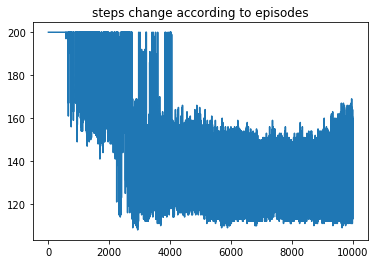

None


In [66]:
plt.plot(planner.step_list)
plt.title('steps change according to episodes')
plt.savefig("steps change according to episodes")
plt.show()
print(traj)

In [67]:
a = np.array(planner.record0)

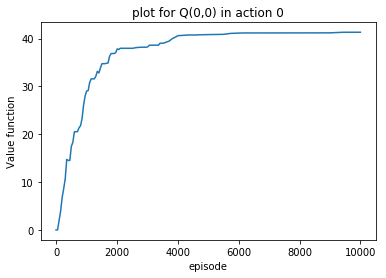

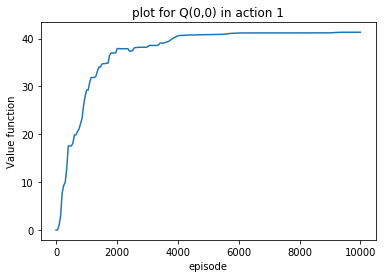

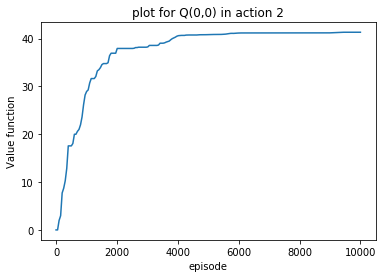

In [69]:
plt.plot(np.linspace(0, 10000, 200),a[:,0])
plt.xlabel("episode")
plt.ylabel("Value function")
plt.title("plot for Q(0,0) in action 0")
#plt.xticks(np.linspace(0, 7000, 8))
plt.savefig("plot for Q(0,0) in action 0")
plt.show()
plt.plot(np.linspace(0, 10000, 200),a[:,1])
plt.xlabel("episode")
plt.ylabel("Value function")
plt.title("plot for Q(0,0) in action 1")
plt.savefig("plot for Q(0,0) in action 1")
plt.show()
plt.plot(np.linspace(0, 10000, 200),a[:,2])
plt.xlabel("episode")
plt.ylabel("Value function")
plt.title("plot for Q(0,0) in action 2")
plt.savefig("plot for Q(0,0) in action 2")
plt.show()

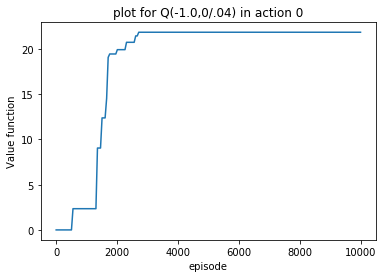

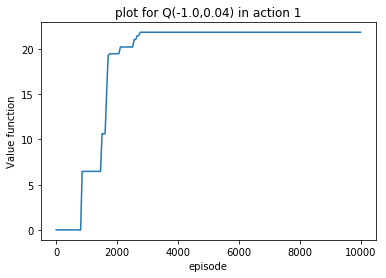

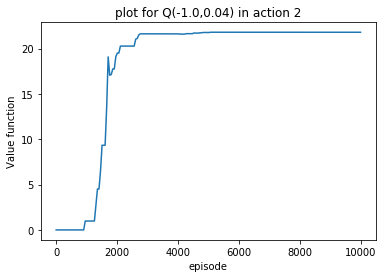

In [70]:
b = np.array(planner.record1)
plt.plot(np.linspace(0, 10000, 200),b[:,0])
plt.xlabel("episode")
plt.ylabel("Value function")
plt.title("plot for Q(-1.0,0/.04) in action 0")
#plt.xticks(np.linspace(0, 7000, 8))
plt.savefig("plot for Q(-1,04) in action 0")
plt.show()
plt.plot(np.linspace(0, 10000, 200),b[:,1])
plt.xlabel("episode")
plt.ylabel("Value function")
plt.title("plot for Q(-1.0,0.04) in action 1")
plt.savefig("plot for Q(-1,04) in action 1")
plt.show()
plt.plot(np.linspace(0, 10000, 200),b[:,2])
plt.xlabel("episode")
plt.ylabel("Value function")
plt.title("plot for Q(-1.0,0.04) in action 2")
plt.savefig("plot for Q(-1,04) in action 2")
plt.show()

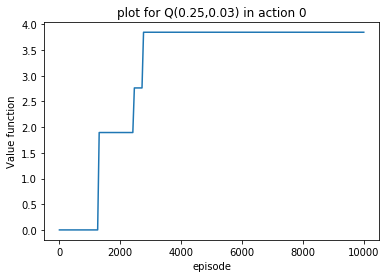

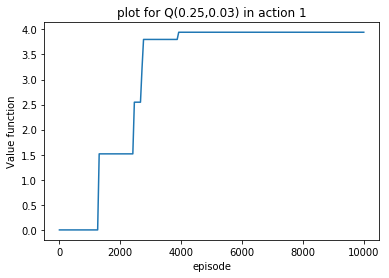

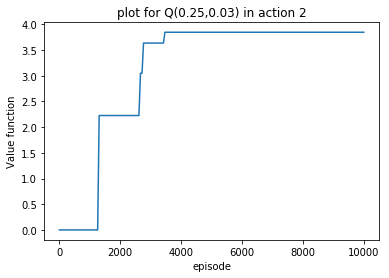

In [71]:
c= np.array(planner.record2)
plt.plot(np.linspace(0, 10000, 200),c[:,0])
plt.xlabel("episode")
plt.ylabel("Value function")
plt.title("plot for Q(0.25,0.03) in action 0")
#plt.xticks(np.linspace(0, 7000, 8))
plt.savefig("plot for Q(25,04) in action 0")
plt.show()
plt.plot(np.linspace(0, 10000, 200),c[:,1])
plt.xlabel("episode")
plt.ylabel("Value function")
plt.title("plot for Q(0.25,0.03) in action 1")
plt.savefig("plot for Q(25,04) in action 1")
plt.show()
plt.plot(np.linspace(0, 10000, 200),c[:,2])
plt.xlabel("episode")
plt.ylabel("Value function")
plt.title("plot for Q(0.25,0.03) in action 2")
plt.savefig("plot for Q(25,04) in action 2")
plt.show()

In [25]:
record_state0 = (np.digitize(0.0,planner.position_space),np.digitize(0.0,planner.velocity_space))
record_state1 = (np.digitize(-1.0,planner.position_space),np.digitize(0.04,planner.velocity_space))
record_state2 = (np.digitize(0.25,planner.position_space),np.digitize(-0.029,planner.velocity_space))

In [15]:
record_state0

(array(26, dtype=int64), array(20, dtype=int64))

In [16]:
record_state1

(array(5, dtype=int64), array(30, dtype=int64))

In [26]:
record_state2

(array(31, dtype=int64), array(12, dtype=int64))

In [21]:
planner.Q_matrix[31,12]

array([5.15132879, 5.14985993, 5.16263488])

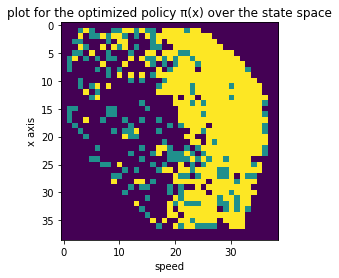

In [72]:
plt.xlabel("speed")
plt.ylabel("x axis")
plt.title("plot for the optimized policy π(x) over the state space")
plt.imshow(np.argmin(planner.Q_matrix,2))
#plt.savefig("plot for Q(25,04) in action 0")
plt.savefig("plot for the optimized policy π(x) over the state space")